In [1]:
# -*- unicode: utf-8 -*-
from __future__ import division
import os 
import json
import math
import codecs
import string
import matplotlib.pyplot as plt
import numpy as np

from time import time
from sklearn import metrics
from sklearn.utils.extmath import density
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn import svm
from scipy import interp
from sklearn.preprocessing import label_binarize

In [2]:
if os.name is 'nt':
    file_path_delim = '\\'
    dataset_path = '\\dataSets\\tweets\\tweets_short.json'
elif os.name is 'posix':
    file_path_delim = '/'
    dataset_path = '/dataSets/tweets/tweets_short.json'

In [3]:
dataset_path = os.getcwd() + dataset_path

tokenizer = lambda doc: doc.lower().split(" ")

dataset_path

'C:\\Users\\Gurol\\Documents\\Lessons\\BIL495\\Codes\\BIL495\\dataSets\\tweets\\tweets_short.json'

In [4]:
datas = json.load(open(dataset_path))

In [5]:
def read_data(datas):
    X = [] # input
    y = [] # label

    for data in datas:
        for key, value in data.items():
        #    print(key, 'value: ', value)
            if key == "TextText":
                X.append(value)
            elif key == "UserID":
                y.append(value)
        
    return X, y

In [6]:
X, y = read_data(datas)

In [7]:
number_of_class = set(y)

In [8]:
number_of_class

{'100341775',
 '1014141614',
 '1037040092',
 '103817724',
 '1058832804',
 '1061610746',
 '1079797910',
 '1151524399',
 '1152451597',
 '1257313244',
 '1278512364',
 '127963928',
 '1286632028',
 '1338800348',
 '1379981628',
 '1431324486',
 '147574230',
 '148382063',
 '1499266621',
 '15016249',
 '154236788',
 '155280601',
 '155534196',
 '1594078644',
 '1608521298',
 '1623755515',
 '1638649314',
 '1658471437',
 '1678245050',
 '1680532806',
 '178519812',
 '182900106',
 '1829708546',
 '18426124',
 '184601733',
 '1907145728',
 '1908986682',
 '206166992',
 '207060084',
 '207411389',
 '212662108',
 '214364824',
 '2161351764',
 '2162910601',
 '2166179760',
 '217879240',
 '219248343',
 '221140049',
 '221859669',
 '2219824690',
 '2241342374',
 '225178363',
 '226586010',
 '2267933576',
 '2269362235',
 '2280957055',
 '229020623',
 '230287600',
 '2302974733',
 '2306968549',
 '2312783506',
 '23186079',
 '2324335390',
 '2327218472',
 '2335496184',
 '233613812',
 '238303027',
 '2424673684',
 '2520456080

In [9]:
X[1], y[1]

("Sn.CB'nımızın çağrısıyla 3 banka konut kredisi faiz oranlarını ℅1'in altına çekti..Bu olumlu bir adım.\n\nAncak şişen piyasa nasıl düşecek?",
 '154236788')

In [10]:
len(X), len(y)

(93753, 93753)

In [11]:
# Split test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
y_label = []
for index in range(1,len(number_of_class)):
    y_label.append(index)


In [13]:
len(y_label), y_label[0], y_label[216]

(217, 1, 217)

In [14]:
# Feature extraction: create feature vector
vectorizer = TfidfVectorizer(norm='l2', min_df=0.05, use_idf=True, smooth_idf=False, sublinear_tf=True,tokenizer=tokenizer)

In [15]:
# Extracting features from the training data using a sparse vectorizer
t0 = time()
X_train = vectorizer.fit_transform(X_train)
duration = time() - t0

'X_train duration time: ', duration

('X_train duration time: ', 2.0147886276245117)

In [16]:
# Extracting features from the test data using the same vectorizer
t0 = time()
X_test = vectorizer.transform(X_test)
duration = time() - t0

'X_test duration time: ', duration

('X_test duration time: ', 0.21616220474243164)

In [17]:
len(y_train)

75002

In [18]:
len(y_test)

18751

In [34]:
# bu yanlis abi bunu degistirmen gerekli
y_test_arr = label_binarize(y_test, classes=number_of_class)
y_test_arr

ValueError: axis(=-1) out of bounds

In [20]:
y_test_arr[0]

array([1, 0, 0, ..., 0, 0, 0])

In [21]:
def benchmark(clf):
    print('_' * 80)
    print('Training')
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print('Train time: %0.3fs' % train_time)
    
    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print('Test time: %0.3fs' % test_time)
    
    score = metrics.accuracy_score(y_test, pred)
    print('accuracy: %0.3f' % score)

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time

In [37]:
# Learn to predict each class against the other
# classifier = OneVsRestClassifier(svm.SVC(kernel='poly', probability=True))
classifier = svm.SVC(kernel='rbf', probability=True)

In [38]:
X_test.shape

(18751, 7)

In [39]:
# t0 = time()
# y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# fit_time = time() - t0
# fit_time


t0 = time()
model = classifier.fit(X_train, y_train)
fit_time = time() - t0
print('Train time: %0.3fs' % fit_time)
print(type(model))

y_score = model.decision_function(X_test)
print()
t0 = time()
preds = model.predict(X_test)
test_time = time() - t0
print('Test time: %0.3fs' % test_time)

score = metrics.accuracy_score(y_test, preds)
print('accuracy: %0.03f' % score) 


# t0 = time()
# y_score = classifier.fit(X_train, y_train)

# probs = classifier.predict_proba(X_test)
# preds = probs[:, 1]

# fit_time = time() - t0
# fit_time

Train time: 930.689s
<class 'sklearn.svm.classes.SVC'>

Test time: 368.750s
accuracy: 0.147


In [29]:
type(y_test), type(y_score) #type(preds)

(list, numpy.ndarray)

In [27]:
y_test[0]

'497735542'

In [28]:
y_score[0]

array([-0.99962068, -0.99951409, -1.        , -0.99954117, -0.99973533,
       -1.        , -0.99962414, -0.99932561, -0.99951409, -1.        ,
       -0.99945421, -1.00001407, -0.99960976, -0.99966388, -0.99962177,
       -0.99997765, -0.99963943, -0.99951409, -0.99964119, -0.99953736,
       -0.99991968, -0.99939428, -0.99972213, -0.99956989, -1.        ,
       -0.99964966, -0.99949224, -0.99958732, -0.99979829, -0.99998941,
       -0.99948331, -0.99969274, -0.99942129, -0.9994801 , -1.00019406,
       -0.99951409, -0.99985376, -0.99964618, -1.00011479, -0.99947419,
       -0.99981954, -0.99962039, -0.99962446, -1.        , -0.99958975,
       -0.99964761, -0.99946969, -0.99969561, -0.99953589, -0.99935899,
       -0.99960702, -0.99927858, -0.99959754, -0.99951716, -0.99997741,
       -0.99948648, -0.99961576, -0.99997361, -0.99967917, -0.99951409,
       -0.99951409, -0.99949847, -0.99972407, -0.99969911, -0.99945479,
       -0.9994515 , -1.00010831, -0.99961246, -1.        , -1.  

In [32]:
y_test_arr[218], y_test_arr.shape

(array([0, 0, 0, ..., 0, 0, 0]), (18751, 18751))

In [33]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
# y_test_arr = [y_test]
# y_test_np = np.array(y_test_arr)
# y_test_np = y_test_np[np.newaxis]
# y_test_np = y_test_np.T

print('len(y_test): ',len(y_test))
print('y_test_arr.shape: ', y_test_arr.shape)
print('type(y_test_arr): ',type(y_test_arr))
print('y_test[:10]: ',y_test[:10])

print('*' * 80)
print('type(y_score): ',type(y_score))
print('y_score.shape: ',y_score.shape)

# print(y_score.shape[1])

#for i in range(len(number_of_class)):
    #fpr[i], tpr[i], _ = roc_curve(y_test_arr[:, i], y_score[:, i])
    #print(fpr[i], tpr[i])
    #roc_auc[i] = auc(fpr[i], tpr[i])



y_test_arr = np.asarray(y_test)
print(type(y_test_arr), y_test_arr.shape)

# fpr, tpr, threshold = roc_curve(y_test_arr, preds)
# roc_auc = auc(fpr, tpr)

len(y_test):  18751
y_test_arr.shape:  (18751, 18751)
type(y_test_arr):  <class 'numpy.ndarray'>
y_test[:10]:  ['497735542', '217879240', '365567541', '219248343', '754477875001233408', '2662417016', '272613386', '214364824', '61171559', '815573942324838405']
********************************************************************************
type(y_score):  <class 'numpy.ndarray'>
y_score.shape:  (18751, 217)


IndexError: index 217 is out of bounds for axis 1 with size 217

In [35]:
results = []
for clf, name in (
            #(KNeighborsClassifier(n_neighbors=10), "kNN"),
            (RandomForestClassifier(n_estimators=100), "Random Forest"),
            (DecisionTreeClassifier(random_state=0), "Decision Tree")):
    
    print("=" * 80)
    print(name)
    results.append(benchmark(clf))

for penalty in ["l2", "l1"]:
    print('=' * 80)
    print("%s penalty" % penalty.upper())
    results.append(benchmark(SGDClassifier(alpha=.0001, n_iter=50,penalty=penalty)))

results.append(benchmark(BernoulliNB(alpha=.01)))

print('=' * 80)
print("LinearSVC with L1-based feature selection")
# The smaller C, the stronger the regularization.
# The more regularization, the more sparsity.
results.append(benchmark(Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False,
                                                  tol=1e-3))),
  ('classification', LinearSVC(penalty="l2"))])))



Random Forest
________________________________________________________________________________
Training
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Train time: 5.578s
Test time: 4.209s
accuracy: 0.150

Decision Tree
________________________________________________________________________________
Training
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0

C:\Users\Gurol\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Train time: 50.408s
Test time: 0.048s
accuracy: 0.036

L1 penalty
________________________________________________________________________________
Training
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


C:\Users\Gurol\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Train time: 50.916s
Test time: 0.040s
accuracy: 0.077

________________________________________________________________________________
Training
BernoulliNB(alpha=0.01, binarize=0.0, class_prior=None, fit_prior=True)
Train time: 0.354s
Test time: 0.032s
accuracy: 0.144

LinearSVC with L1-based feature selection
________________________________________________________________________________
Training
Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0),
        norm_order=1, prefit=...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])
Train time: 88.230s
Test time: 0.043s
accuracy: 0.142



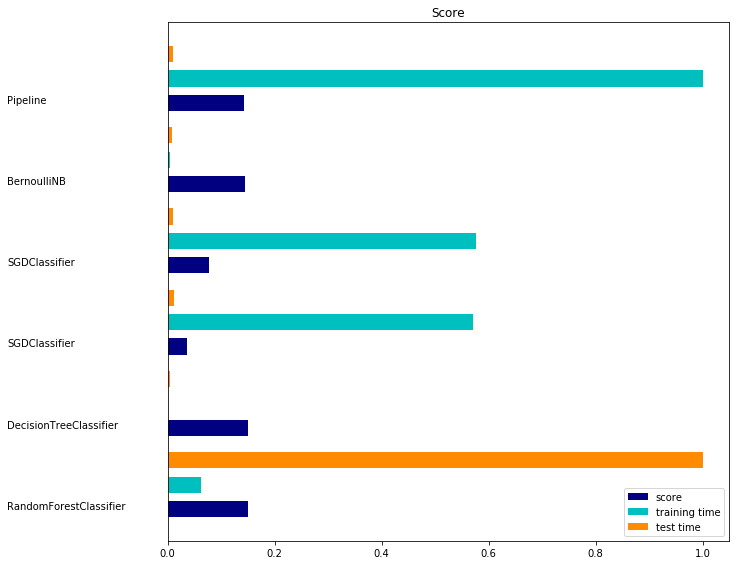

In [36]:
indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results

training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12,8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time", color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)
    
plt.show()
